In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas_datareader as web
import datetime

In [3]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [4]:
start = datetime.datetime(pd.datetime.now().year-1,pd.datetime.now().month,pd.datetime.now().day)
end = datetime.datetime(pd.datetime.now().year,pd.datetime.now().month,pd.datetime.now().day)

In [5]:
stock = web.DataReader('TCS','yahoo',start,end)

In [6]:
stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,7.36,6.85,6.87,7.27,227900,7.27
2019-03-21,7.31,7.03,7.25,7.16,192800,7.16
2019-03-22,7.19,6.96,7.11,7.06,167700,7.06
2019-03-25,7.28,7.01,7.05,7.17,130900,7.17
2019-03-26,7.60,7.23,7.24,7.59,398200,7.59


***********************************************************************************************************************
Price fluctuation over the last one year from 2019-03-21 00:00:00 to 2020-03-21 00:00:00
***********************************************************************************************************************


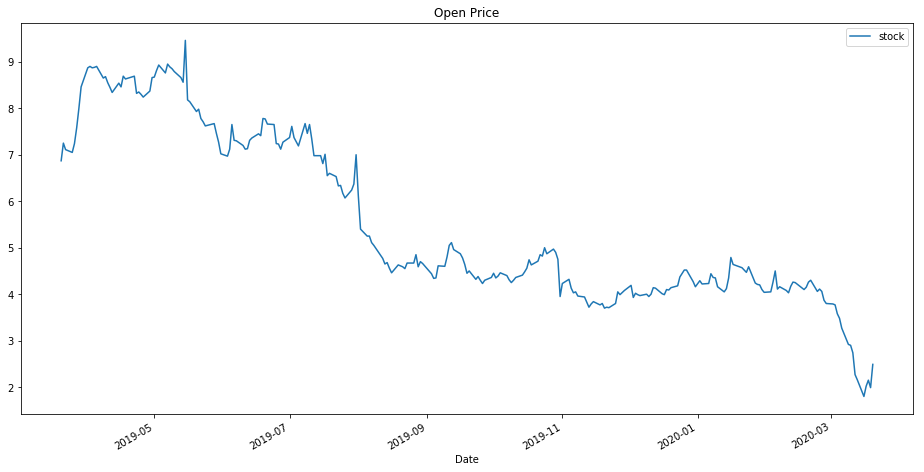

In [7]:
print (color.GREEN+'***********************************************************************************************************************')
print (color.GREEN + '\033[1m' + 'Price fluctuation over the last one year from %s to %s'%(start, end))
print ('***********************************************************************************************************************')

stock['Open'].plot(label='stock',figsize=(16,8),title='Open Price')
plt.legend()
plt.show();

***********************************************************************************************************************
Total volume traded over the last one year from 2019-03-21 00:00:00 to 2020-03-21 00:00:00
***********************************************************************************************************************


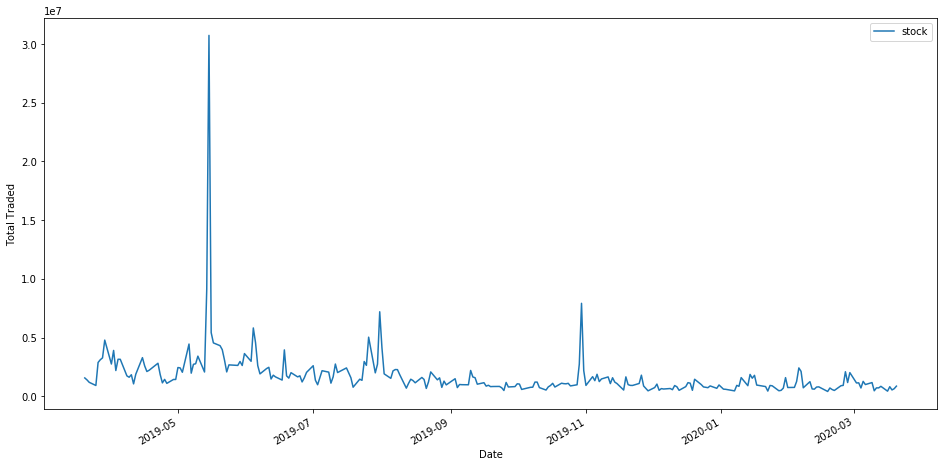

In [8]:
stock['Total Traded'] = stock['Open']*stock['Volume']

print (color.GREEN+'***********************************************************************************************************************')
print (color.GREEN + '\033[1m' + 'Total volume traded over the last one year from %s to %s'%(start, end))
print ('***********************************************************************************************************************')

stock['Total Traded'].plot(label='stock',figsize=(16,8))
plt.ylabel('Total Traded')
plt.legend()
plt.show();

In [9]:
stock['Total Traded'].idxmax()


Timestamp('2019-05-15 00:00:00')

In [10]:
stock['Total Traded'].max()

30732702.12392807

***********************************************************************************************************************
MA50 and MA200 over the last one year from 2019-03-21 00:00:00 to 2020-03-21 00:00:00
***********************************************************************************************************************


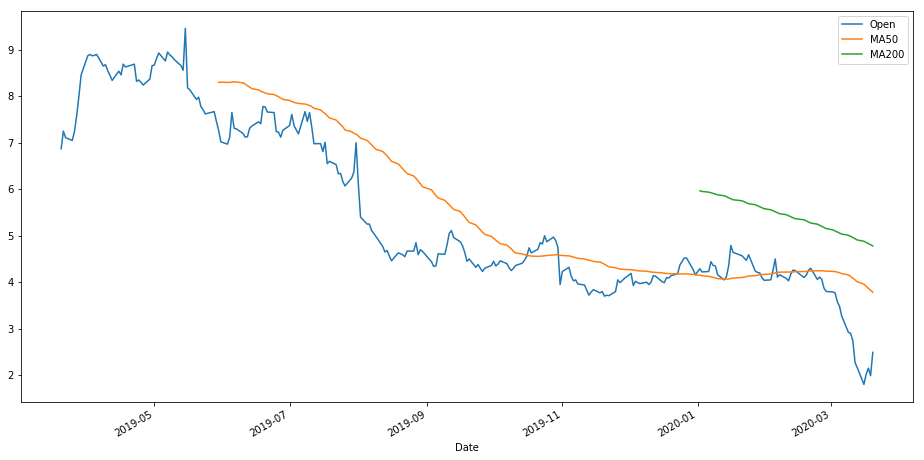

In [11]:
print (color.GREEN+'***********************************************************************************************************************')
print (color.GREEN + '\033[1m' + 'MA50 and MA200 over the last one year from %s to %s'%(start, end))
print ('***********************************************************************************************************************')

stock['MA50'] = stock['Open'].rolling(50).mean()
stock['MA200'] = stock['Open'].rolling(200).mean()
stock[['Open','MA50','MA200']].plot(label='stock',figsize=(16,8))
plt.show();

***********************************************************************************************************************
Candelistic Chart  over the last 2 months
***********************************************************************************************************************


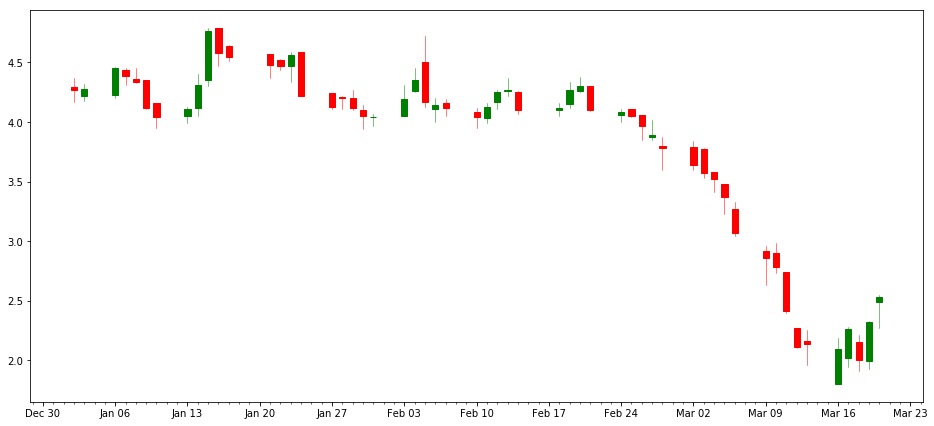

In [12]:
import mpl_finance
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

# Rest the index to get a column of January Dates
stock_reset = stock.loc['2020-01':'2020-03'].reset_index()
print (color.GREEN+'***********************************************************************************************************************')
print (color.GREEN + '\033[1m' + 'Candelistic Chart  over the last 2 months')
print ('***********************************************************************************************************************')

# Create a new column of numerical "date" values for matplotlib to use
stock_reset['date_ax'] = stock_reset['Date'].apply(lambda date: date2num(date))
stock_values = [tuple(vals) for vals in stock_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

#Plot it
fig, ax = plt.subplots(figsize=(16,8))
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, stock_values, width=0.6, colorup='g',colordown='r')
plt.show();


***********************************************************************************************************************
Percentage change of the stock  over the last one year from 2019-03-21 00:00:00 to 2020-03-21 00:00:00 😀
***********************************************************************************************************************


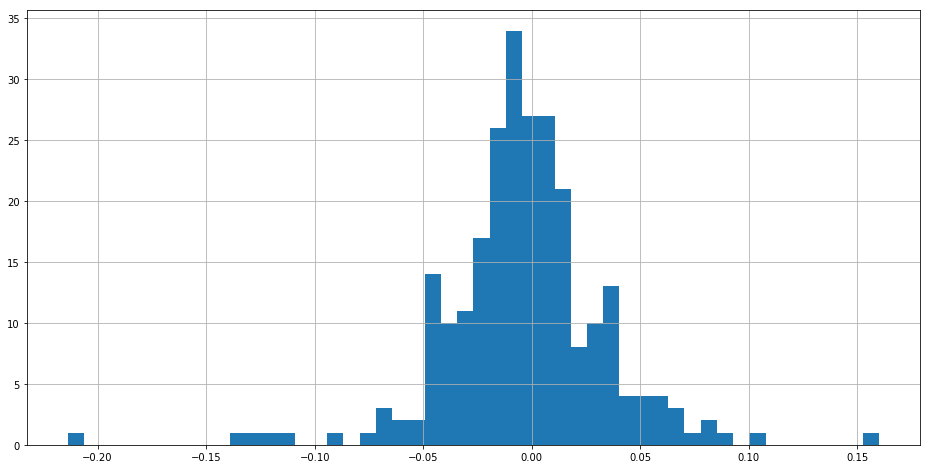

In [13]:
print (color.GREEN+'***********************************************************************************************************************')
print (color.GREEN + '\033[1m' + 'Percentage change of the stock  over the last one year from %s to %s \N{grinning face}'%(start, end))
print ('***********************************************************************************************************************')

#stock['returns'] = (stock['Close'] / stock['Close'].shift(1) ) - 1
stock['returns'] = stock['Close'].pct_change(1)
stock['returns'].hist(bins=50,figsize=(16,8))
plt.show()

***********************************************************************************************************************
Cumulative Daily returns over the last one year from 2019-03-21 00:00:00 to 2020-03-21 00:00:00 😀
***********************************************************************************************************************


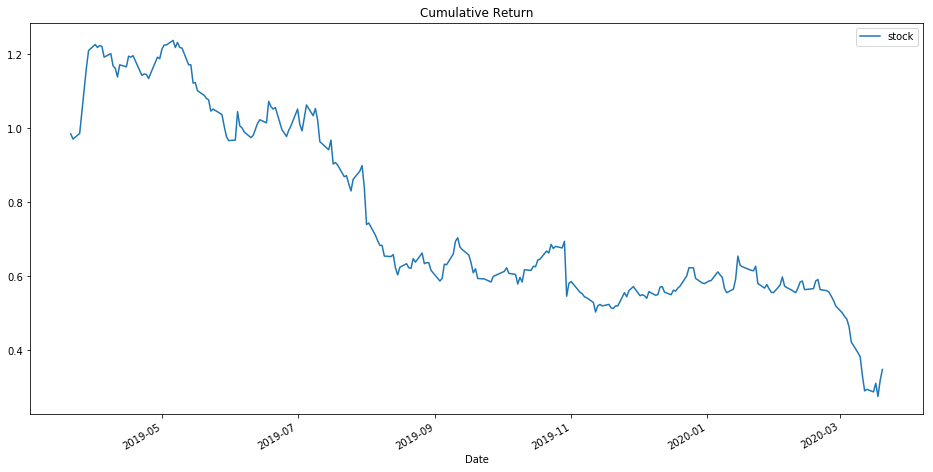

In [14]:
print (color.GREEN+'***********************************************************************************************************************')
print (color.GREEN+'\033[1m' + 'Cumulative Daily returns over the last one year from %s to %s \N{grinning face}'%(start, end))
print ('***********************************************************************************************************************')
stock['Cumulative Return'] = (1 + stock['returns']).cumprod()
stock['Cumulative Return'].plot(label='stock',figsize=(16,8),title='Cumulative Return')
plt.legend()
plt.show()

***********************************************************************************************************************
Cumulative Daily returns over the last Three Months 😀
***********************************************************************************************************************


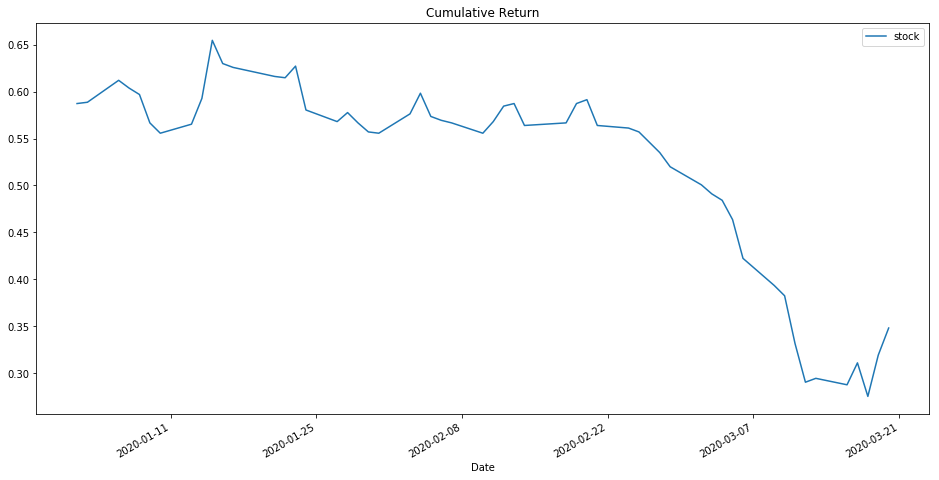

In [15]:
print (color.GREEN+'***********************************************************************************************************************')
print (color.GREEN+'\033[1m' + 'Cumulative Daily returns over the last Three Months \N{grinning face}')
print ('***********************************************************************************************************************')
stock['Cumulative Return'] = (1 + stock['returns']).cumprod()
stock['Cumulative Return'].loc['2020-01':'2020-03'].plot(label='stock',figsize=(16,8),title='Cumulative Return')
plt.legend()
plt.show()